<h1 style="text-align: center;">Trabalho Prático 1</h1>

<h3 style="text-align: center;">Aluno 1: Turi Andrade (2020007074)</h3>
<h3 style="text-align: center;">Aluno 2: Lourenço Monteiro (202000????)</h3>

## Introdução

No nosso trabalho, desenvolvemos os seguintes algoritmos e estruturas de dados de geometria computacional: Envoltória Convexa, Verificador de Separabilidade Linear Baseado em Envoltórias, Verificador de Interseção de um Conjunto de Segmentos e Árvores K-Dimensionais. Além disso, desenvolvemos dois modelos supervisionados de classificação binária: o primeiro deles, baseado em Envoltória Convexa, consiste em uma linha que separa as envoltórias das duas classes e funciona bem somente se os dados são linearmente separáveis ou próximos disso. Já o segundo, baseado em Árvores K-Dimensionais, computa os vizinhos mais próximos de um ponto para determinar sua classe.

O treinamento e teste dos modelos foram feitos usando as 10 bases de dados na pasta _/datasets_, e os modelos foram comparados pelos seus resultados para o conjunto de teste.

As classes e estruturas de dados implementadas no trabalho estão na pasta _/modules_.

#### Impedindo notebook de criar diretório _\_\_pycache\_\__

In [1]:
import sys
sys.dont_write_bytecode = True

#### Importando módulos

In [2]:
from modules.point import Point, PointDataset
from modules.convexHull import ConvexHull2D
from modules.KDTree import KDTree
from modules.line import Line2D
from modules.segment import Segment
from modules.intersectionChecker import IntersectionChecker
from modules.classifier import ConvexHullClassifier, KNNClassifier, ClassifiersComparison

#### Importando bibliotecas externas

In [3]:
from random import choices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Envoltória convexa

O primeiro algoritmo de Geometria Computacional que implementamos é a Varredura de Graham, que resolve o problema de definir o menor polígono possível que abranja todos os pontos de um conjunto, ou seja, ou o ponto está contido dentro do polígono ou em uma de suas arestas.

O algoritmo funciona da seguinte forma: primeiramente, escolhe-se um ponto inicial, aquele que tiver menor coordenada y, pois esse ponto necessariamente será um vértice da envoltória. Esse processo tem complexidade O(n), por iterar por todos os pontos. 

A partir disso, os pontos são ordenados de acordo com o ângulo polar formado em relação ao ponto inicial escolhido. Utilizamos o QuickSort para ordená-los.

Dessa forma, o algoritmo começa suas iterações para montar a envoltória. Os pontos, em ordem, são adicionados à trajetória da envoltória, checando se a direção da nova aresta não faz uma conversão no sentido horário em relação à imediatamente anterior, pois, como os pontos estão ordenados no sentido anti-horário, uma conversão horária geraria um polígono côncavo. Caso haja uma conversão no sentido horário, o ponto final da aresta imadiatamente aterior deve ser descartado e um novo teste é feito com as arestas formadas pelos pontos remanescentes até que uma conversão anti-horária seja encontrada. Quando há uma conversão anti-horária, o algoritmo prossegue para o próximo ponto. A complexidade desse passo é _O(n)_, pois todas os pontos são adicionados e removidos da envoltória no máximo 1 vez.

Assim que o algoritmo passa por todos os pontos, a envoltória convexa é definida. A complexidade assintótica de tempo final é O(n log n), pois a complexidade da ordenação que domina o algoritmo. As checagens de orientação dos segmentos (arestas) são O(1).

Para representar os segmentos, a classe _Segment_ foi criada. Seu construtor recebe os dois pontos que formam o segmento. Seu método estático _direction2D_ recebe como parâmetro 2 segmentos e retorna -1 se o primeiro estiver anti-horário em relação ao segundo, 0 se forem colineares e 1 se o primeiro estiver horário em relação ao segundo. Isso é feito em tempo constante, usando o sinal produto vetorial dos segmentos.

Para implementação do algoritmo de envoltória convexa, a classe _ConvexHull2D_ foi implementada. Ela recebe como parâmetros uma lista de pontos n-dimensionais e as 2 dimensões _c1_ (x) e _c2_ (y) para as quais a envoltória deve ser computada. A construção da envoltória é feita pelo método _build_, que implementa o algoritmo descrito acima.

Na construção da envoltória, antes do loop principal do método _build_, é necessário remover pontos colineares em relação ao ponto de menor coordenada y. Isso é feito pelo método _removeCollinearPoints_.

## Árvores K-Dimensionais

No nosso trabalho, implementamos a classe _KDTree_, que é uma árvore k-dimensional. Dado um conjunto de pontos de dimensão _n_, a ávore é construida particionando o conjunto de pontos repetidamente, usando como pivô a mediana da dimensão _i_, com _i_ variando de _1_ a _n_ de forma cíclica, até que as partições contanham somente 1 ponto. A variação utilizada de Árvores k-dimensionais contém valores nos nós internos, e não somente nas folhas. Na construção da árvore, são computadas as regiões do hiperplano representadas por cada nó (bounding boxes).

O principal método interessante para o trabalho implementado pela classe é _kNearestNeighbors_, que, dado um ponto _p_, computa seus _k_ vizinhos mais próximos. Isso é feito da seguinte forma: percorre-se a árvore para encontrar a região do hiperplano que contém _p_ recursivamente. Os nós da árvore percorridos representam regiões Computa-se a distância _d1_ de _p_ até o nó _n1_ que representa a região corrente, e a distância _d2_ de _p_ até à região pai. Adiciona-se _n1_ à um heap máximo de tamanho _k_. Se _d2 > d1_, recorre-se na região irmã (o outro nó descentente do mesmo nó pai) da mesma forma. O heap, quando cheio, recebe um novo elemento se, e somente se, a distância do novo elemento até _p_ for menor do que a maior distância no heap (elemento raíz). Nesse caso, a raíz é removida e o heap é reformulado com o elemento novo.

A complexidade de tempo de busca por _k_ vizinhos é, em média, _O(sqrt(n) + k)_, sendo _n_ o número de pontos na árvore. Quando _k = 1_, a complexidade média da busca é _O(log n)_.

Dados dois conjuntos disjuntos de pontos, o método estático _closestPointsSubsets_ da classe encontra os dois pontos mais proximos, pertencentes cada um à um conjunto. Isso é feito montando uma _KDTree_ com os elementos do conjunto de maior cardinalidade _A_ e executando o método _kNearestNeighbors_ uma vez para cada elemento do conjunto de menor cardinalidade _B_, mantendo a menor distância computada. Tal processo tem complexidade _O(B * log A)_.

## Verificador de Separabilidade Linear Baseado em Envoltórias

Dados dois conjuntos de pontos, usamos Envoltórias Convexas para verificar sua separabilidade linear. Isso é feito da seguinte forma: primeiramente são computadas as envoltórias respectivas à cada conjunto. Depois, os pontos mais próximos _p_ e _q_, sendo um de cada conjunto, são computados usando uma Árvore K-Dimensional. Após isso, usando a classe _Line2D_, que monta a equação de uma linha dados 2 pontos, é computada a linha _L_ que une _p_ e _q_. Ainda usando a classe _Line2D_, por meio do método _perpendicularLine_, é computada a linha _P_ perpendicular à _L_. Esses procedimentos tem complexidade constante.

Após isso, cada de conjunto é percorrido, verificando se todos os seus pontos estão do mesmo lado de _P_. Caso isso seja verdadeiro, e os conjuntos estejam, como um todo, em lados diferentes de _P_, os dados são linearmente separáveis. Caso contrário, não. Isso é feito pelo método _areLinearlySeparable_, também da classe _Line2D_.

## Testes para pontos linearmente separáveis

#### Gerando 2 classes de pontos, linearmente separáveis entre si

In [4]:
lsPoints1 = []
for i in range(100):
    x = np.random.randint(-100, 0)
    y = np.random.randint(-100, 0)
    
    lsPoints1.append(Point(np.array([x, y])))

lsPoints2 = []
for i in range(100):
    x = np.random.randint(0, 100)
    y = np.random.randint(0, 100)
    
    lsPoints2.append(Point(np.array([x, y])))

#### Construindo envoltórias

In [5]:
lsCh1 = ConvexHull2D(lsPoints1, 0, 1)
lsHull1 = lsCh1.getHull()

lsCh2 = ConvexHull2D(lsPoints2, 0, 1)
lsHull2 = lsCh2.getHull()

#### Encontrando vértices mais próximos entre as duas envoltórias

In [6]:
[(lsHull1p, lsHull2p), lsHullsDist] = KDTree.closestPointsSubsets(lsHull1, lsHull2)

#### Computando linha que conecta os pontos mais próximos entre as envoltórias

In [7]:
lsLine = Line2D(0, 1, point1=lsHull1p, point2=lsHull2p)

#### Computando linha perpendicular que passa pela mediana dos pontos mais próximos entre as envoltórias

In [8]:
pLsLine = lsLine.perpendicularLine()

#### Testando separabilidade linear dos pontos de acordo com a linha perpendicular gerada

In [9]:
pLsLine.areLinearlySeparable(lsPoints1, lsPoints2)

True

#### Plotando envoltórias e linha de separação

In [10]:
isVertical, verticalCross = pLsLine.isVertical()

if(isVertical):
    plp1 = Point(np.array([verticalCross, -100]))
    plp2 = Point(np.array([verticalCross, 100]))
else:
    y1 = pLsLine.equation(-100)
    y2 = pLsLine.equation(100)
    plp1 = Point(np.array([-100, y1]))
    plp2 = Point(np.array([100, y2]))

(-110.0, 412.5, -270.1875, 252.3125)

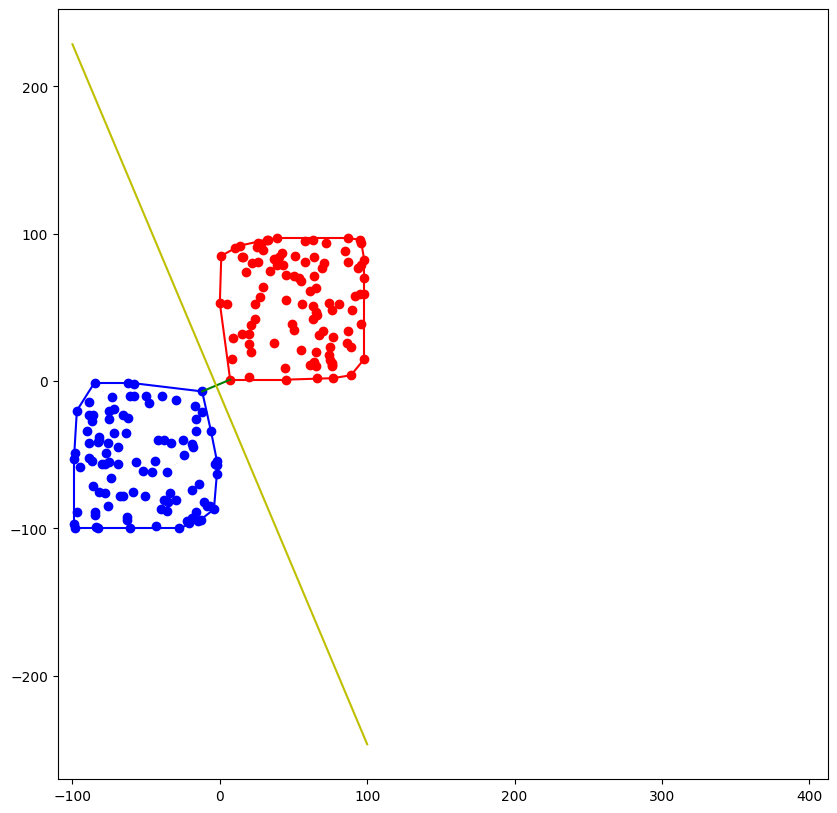

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

for point in lsPoints1:
    ax.plot([point.getCoordinate(0)], [point.getCoordinate(1)], marker="o", color="b")

for point in lsPoints2:
    ax.plot([point.getCoordinate(0)], [point.getCoordinate(1)], marker="o", color="r")
    

for i in range(len(lsHull1) - 1):
    ax.plot([lsHull1[i].getCoordinate(0), lsHull1[i+1].getCoordinate(0)], [lsHull1[i].getCoordinate(1), lsHull1[i+1].getCoordinate(1)], color='b')

ax.plot([lsHull1[len(lsHull1) - 1].getCoordinate(0), lsHull1[0].getCoordinate(0)], [lsHull1[len(lsHull1) - 1].getCoordinate(1), lsHull1[0].getCoordinate(1)], color="b")

for i in range(len(lsHull2) - 1):
    ax.plot([lsHull2[i].getCoordinate(0), lsHull2[i+1].getCoordinate(0)], [lsHull2[i].getCoordinate(1), lsHull2[i+1].getCoordinate(1)], color='r')

ax.plot([lsHull2[len(lsHull2) - 1].getCoordinate(0), lsHull2[0].getCoordinate(0)], [lsHull2[len(lsHull2) - 1].getCoordinate(1), lsHull2[0].getCoordinate(1)], color="r")


ax.plot([lsHull1p.getCoordinate(0), lsHull2p.getCoordinate(0)], [lsHull1p.getCoordinate(1), lsHull2p.getCoordinate(1)], color="g")
ax.plot([plp1.getCoordinate(0), plp2.getCoordinate(0)], [plp1.getCoordinate(1), plp2.getCoordinate(1)], color="y")

ax.axis('square')

## Testes para pontos não linearmente separáveis

#### Gerando classes de pontos, não linearmente separáveis entre si

In [12]:
nlsPoints1 = []
for i in range(100):
    x = np.random.randint(-100, 25)
    y = np.random.randint(-100, 25)
    
    nlsPoints1.append(Point(np.array([x, y])))

nlsPoints2 = []
for i in range(100):
    x = np.random.randint(-25, 100)
    y = np.random.randint(-25, 100)
    
    nlsPoints2.append(Point(np.array([x, y])))

#### Construindo envoltórias

In [13]:
nlsCh1 = ConvexHull2D(nlsPoints1, 0, 1)
nlsHull1 = nlsCh1.getHull()

nlsCh2 = ConvexHull2D(nlsPoints2, 0, 1)
nlsHull2 = nlsCh2.getHull()

#### Encontrando vértices mais próximos entre as duas envoltórias

In [14]:
[(nlsHull1p, nlsHull2p), nlsHullsDist] = KDTree.closestPointsSubsets(nlsHull1, nlsHull2)

#### Computando linha que conecta os pontos mais próximos entre as envoltórias

In [15]:
nlsLine = Line2D(0, 1, point1=nlsHull1p, point2=nlsHull2p)

#### Computando linha perpendicular que passa pela mediana dos pontos mais próximos entre as envoltórias

In [16]:
pNlsLine = nlsLine.perpendicularLine()

#### Testando separabilidade linear dos pontos de acordo com a linha perpendicular gerada

In [17]:
pLsLine.areLinearlySeparable(nlsPoints1, nlsPoints2)

False

#### Plotando envoltórias e linha de separação

In [18]:
isVertical, verticalCross = pNlsLine.isVertical()

if(isVertical):
    plp1 = Point(np.array([verticalCross, -100]))
    plp2 = Point(np.array([verticalCross, 100]))
else:
    y1 = pNlsLine.equation(-100)
    y2 = pNlsLine.equation(100)
    plp1 = Point(np.array([-100, y1]))
    plp2 = Point(np.array([100, y2]))

(-110.0, 110.0, -106.8, 113.2)

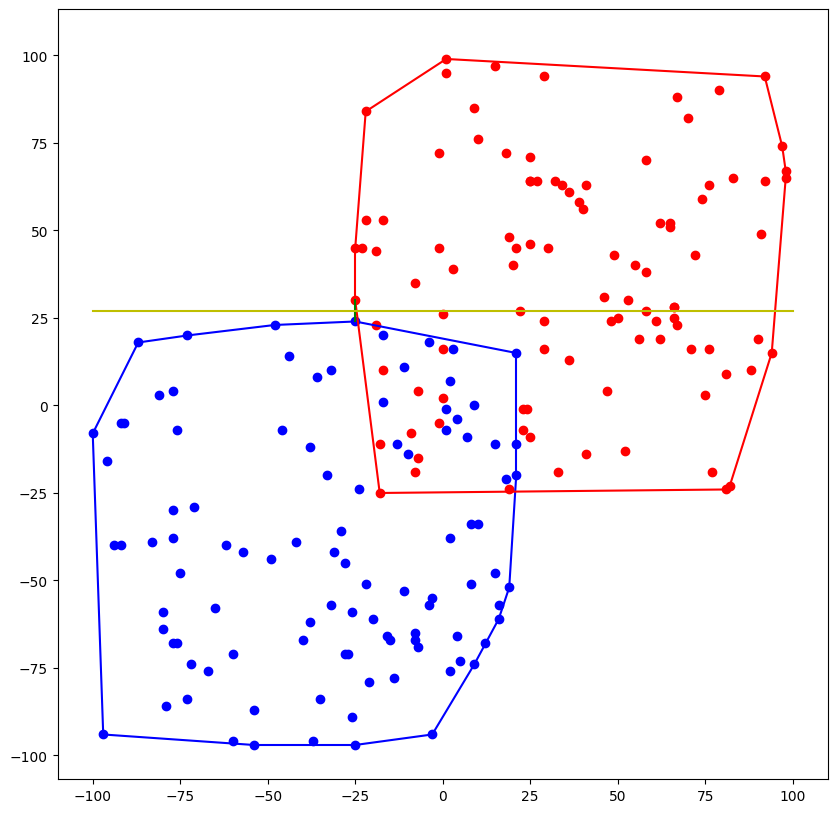

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

for point in nlsPoints1:
    ax.plot([point.getCoordinate(0)], [point.getCoordinate(1)], marker="o", color="b")

for point in nlsPoints2:
    ax.plot([point.getCoordinate(0)], [point.getCoordinate(1)], marker="o", color="r")
    

for i in range(len(nlsHull1) - 1):
    ax.plot([nlsHull1[i].getCoordinate(0), nlsHull1[i+1].getCoordinate(0)], [nlsHull1[i].getCoordinate(1), nlsHull1[i+1].getCoordinate(1)], color='b')

ax.plot([nlsHull1[len(nlsHull1) - 1].getCoordinate(0), nlsHull1[0].getCoordinate(0)], [nlsHull1[len(nlsHull1) - 1].getCoordinate(1), nlsHull1[0].getCoordinate(1)], color="b")

for i in range(len(nlsHull2) - 1):
    ax.plot([nlsHull2[i].getCoordinate(0), nlsHull2[i+1].getCoordinate(0)], [nlsHull2[i].getCoordinate(1), nlsHull2[i+1].getCoordinate(1)], color='r')

ax.plot([nlsHull2[len(nlsHull2) - 1].getCoordinate(0), nlsHull2[0].getCoordinate(0)], [nlsHull2[len(nlsHull2) - 1].getCoordinate(1), nlsHull2[0].getCoordinate(1)], color="r")


ax.plot([nlsHull1p.getCoordinate(0), nlsHull2p.getCoordinate(0)], [nlsHull1p.getCoordinate(1), nlsHull2p.getCoordinate(1)], color="g")
ax.plot([plp1.getCoordinate(0), plp2.getCoordinate(0)], [plp1.getCoordinate(1), plp2.getCoordinate(1)], color="y")

ax.axis('square')

## Verificador de Interseção de um Conjunto de Segmentos

Dado um conjunto de segmentos, a classe _intersectionChecker_ foi implementada para verificar se eles se interceptam. A classe recebe um conjunto de segmentos n dimensionais e as duas dimensões _c1_ e _c2_ para as quais a checagem será feita. Depois, executa o seguinte algoritmo: primeiramente, os pontos dos segmentos são ordenados pela dimensão _c1_. 

Após isso, os pontos são percorridos: seja _p_ o ponto corrente de um segmento _s_. 

Se _p_ for um ponto de início (coordenada _c1_ mais à esquerda em comparação ao outro ponto de _s_), o segmento _s_ é adicionado à árvore _A_, usando a coordenada _c2_ de _p_ para comparação na inserção. Se _s_ interceptar seu sucessor ou antecessor imediato na árvore, o algoritmo retorna verdadeiro. 

Se _p_ for um ponto de fim (coordenada _c1_ mais à direita em comparação ao outro ponto de _s_), o segmento _s_ é removido da árvore _A_. Porém, antes de remover _s_, é verificado se o sucessor de _s_ intercepta seu antecessor. Se sim, o algoritmo retorna verdadeiro.

Caso não retorne verdadeiro, o algoritmo retorna falso.

A árvore usada é uma _AVL_ e tem custo de inserção, busca e remoção _O(log n)_. Sua implementação está na classe _AVLTree_.

A verificação de interseção entre 2 segmentos está implementada na classe _Segment_, no método _intersects2D_, que recebe 2 segmentos e as coordenadas _c1_ e _c2_ para comparação. A verificação de interseção é feita usando o sinal do produto vetorial dos segmentos, e tem complexidade constante. 

Dessa forma, a complexidade total do método é _O(n log n)_, custo da ordenação e de percorrer os segmentos fazendo manipulações usando a árvore AVL.

### Teste de interseção em conjunto de segmentos

#### Gerando segmentos

In [20]:
segments = []

for i in range(4):
    p1 = Point(np.random.randint(0, 1000, size=2))
    p2 = Point(np.random.randint(0, 1000, size=2))

    segments.append(Segment(p1, p2))

#### Executando verificação

In [21]:
intersectionChecker = IntersectionChecker(segments, coordinate1=0, coordinate2=1)

intersectionChecker.run()

False

#### Averiguando resultado visualmente

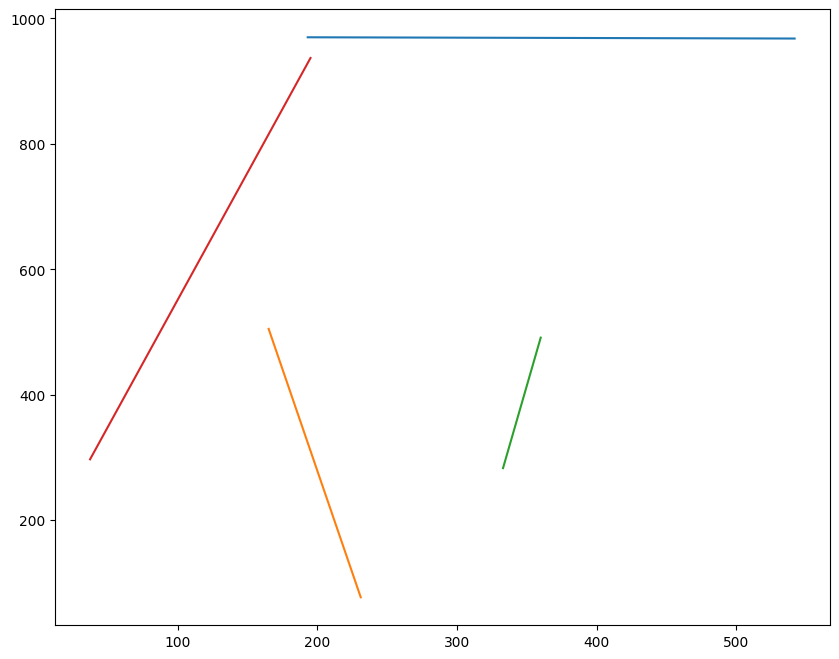

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

for segment in segments:
    ax.plot([segment.getPointCoordinate(0, 0), segment.getPointCoordinate(1, 0)], [segment.getPointCoordinate(0, 1), segment.getPointCoordinate(1, 1)])

## Classificadores

Usando os métodos acima, foram implementados dois classificadores.

Os dados foram divididos aleatóriamente entre treino e teste no processo de classificação, mantendo por padrão uma proporção de 70% dos dados para treino e 30% para teste.

Para ambos classificadores, o processo de treino foi feito com validação cruzada, cujo número de _folds_ (dobras) pode ser passado para os construtores de suas respectivas classes.

As métricas usadas para avaliar o desempenho dos classificadores foram _Precisão_, _Sensibilidade_, _F1 Score_ e _Acurácia_

O primeiro deles, baseado em Envoltória Convexa, funciona da seguinte forma: dado um conjunto de pontos legendados de treino, cada um pertencente à uma classe de 2 possíveis, a envoltória de cada classe é computada, assim como a linha _L_ que conecta os pontos mais próximos entre elas, e a linha _P_, perpendicular à _L_. O processo é feito da forma como foi explicado nos itens anteriores, pela classe _ConvexHullClassifier_. Após esse processo, o classificador está treinado, e a previsão para um ponto _p_ pode ser -1, se _p_ estiver abaixo de _P_, ou 1, se _p_ estiver acima de _P_. Os pontos podem ser n dimensionais, mas são passadas para o classificador em sua construção as dimensões _c1_ e _c2_, para as quais a classificação será feita. O classificador só aceita 2 dimensões, pois a envoltória só é computada para 2 dimensões pela classe _ConvexHull2D_.

O segundo, baseado em Árvores K-Dimensionais, é um classificador de vizinhos mais próximos, que funciona da seguinte forma: dado um conjunto de pontos legendados de treino, cada um pertencente à uma classe de 2 possíveis, uma árvore K-Dimensional é montada com os pontos, pela classe _KNNClassifier_. Para o construtor da classe, é passado o parâmetro _k_, que representa o número de vizinhos. A previsão do classificador para o ponto _p_ consiste na classe majoritária entre os _k_ vizinhos mais próximos de _p_, que são computados pelo método _kNearestNeighbors_ de _KDTree_. Caso _k_ não seja passado, o número de vizinhos que maximiza a métrica _F1 Score_ média para a validação cruzada é computado iterativamente.

## Comparação de classificadores

Para comparar o desempenho de um conjunto de classificadores para determinado dataset, a classe _classifiersComparison_ foi implementada. Ela recebe um grupo de instâncias de classificadores configurados (com parâmetros definidos) e um dataset, e faz as comparações par a par dos resultados para o dataset passado, usando a técnica bootstrapping. O número de amostras e o tamanho de cada amostra com reposição são passados como parâmetros para a classe. Para cada amostra e para cada par, no bootstrapping, são computadas o valor das métricas enumeradas acima para o par de classificadores ( _clf1_, _clf2_ ) em questão e sua subtração ( _clf1\_metrics_ - _clf2\_metrics_ ) é calculada. Dessa forma, é retornado um conjunto da diferença de diversas amostras nas métricas de avaliação para todos os pares de classificadores.

## Datasets

As 10 bases de dados usadas podem ser encontrados na pasta _/datasets_. A maioria delas possui apenas duas classes. Porém algumas possuem multiplas classes. Nestes casos, foi feita classificação um contra todos.

O desempenho dos 2 classificadores para cada uma das bases de dados foi comparada, também na pasta _/datasets_.

Para ler as bases de dados, que consistem em arquivos no formato _.dat_, foi implementada a classe _PointDataset_, que recebe como parâmetro conigurações de tradução de legendas e valores de atributos dos dados.

### Exemplo de comparação entre classificadores para uma bases de dados

A título de exemplo, será exemplificado o processo de classificação e comparação entre dois classificadores para a base de dados _vehicle_. As demais implementações podem ser encontradas em _/datasets_

#### Lendo dataset

O dataset vehicle contém 4 classes. Será feita classificação um contra todos para a classe 1.

In [4]:
dataset = PointDataset("./datasets/vehicle/data.dat", labelTranslation={'van ':1, 'saab':-1, 'bus ':-1, 'opel':-1})
points = dataset.getPoints()

#### Criando instância do classificador baseado em envoltória convexa para as features (0, 1)

In [31]:
CHclf01 = ConvexHullClassifier(points, coordinate1=0, coordinate2=1, nFolds=5)
CHresults01 = CHclf01.run()

#### Plotando classificador

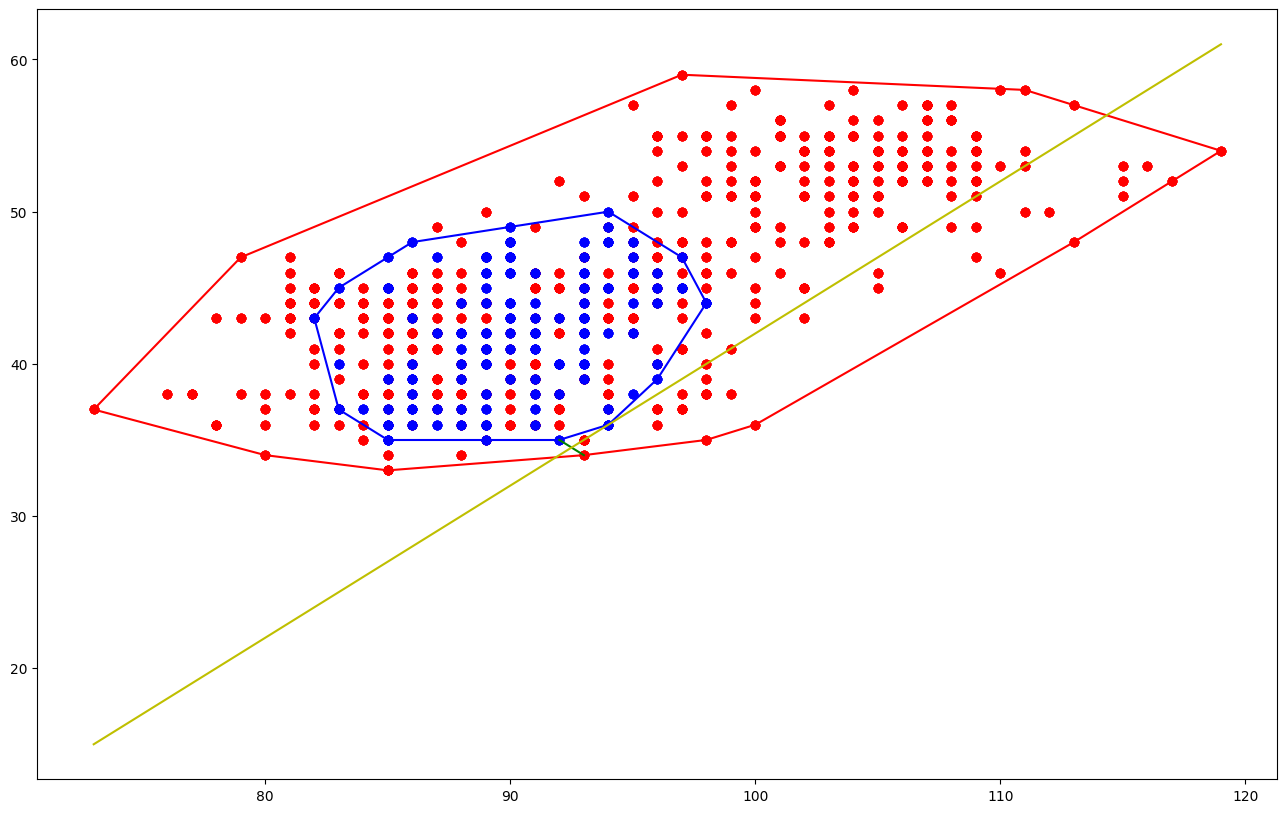

In [32]:
CHclf01.plotHulls()

#### Verificando separabilidade linear dos pontos

In [33]:
CHclf01.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [34]:
CHresults01["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.214286,1.0,0.214286,0.254237
1,0.254386,1.0,0.254386,0.279661
2,0.277778,1.0,0.277778,0.338983
3,0.203540,1.0,0.203540,0.237288
4,0.256637,1.0,0.256637,0.288136


#### Resultados do teste

In [35]:
CHresults01["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.246809,0.90625,0.246809,0.279528


#### Criando instância do classificador baseado em envoltória convexa para as features (1, 2)

In [20]:
CHclf12 = ConvexHullClassifier(points, coordinate1=1, coordinate2=2, nFolds=5)
CHresults12 = CHclf12.run()

#### Plotando classificador

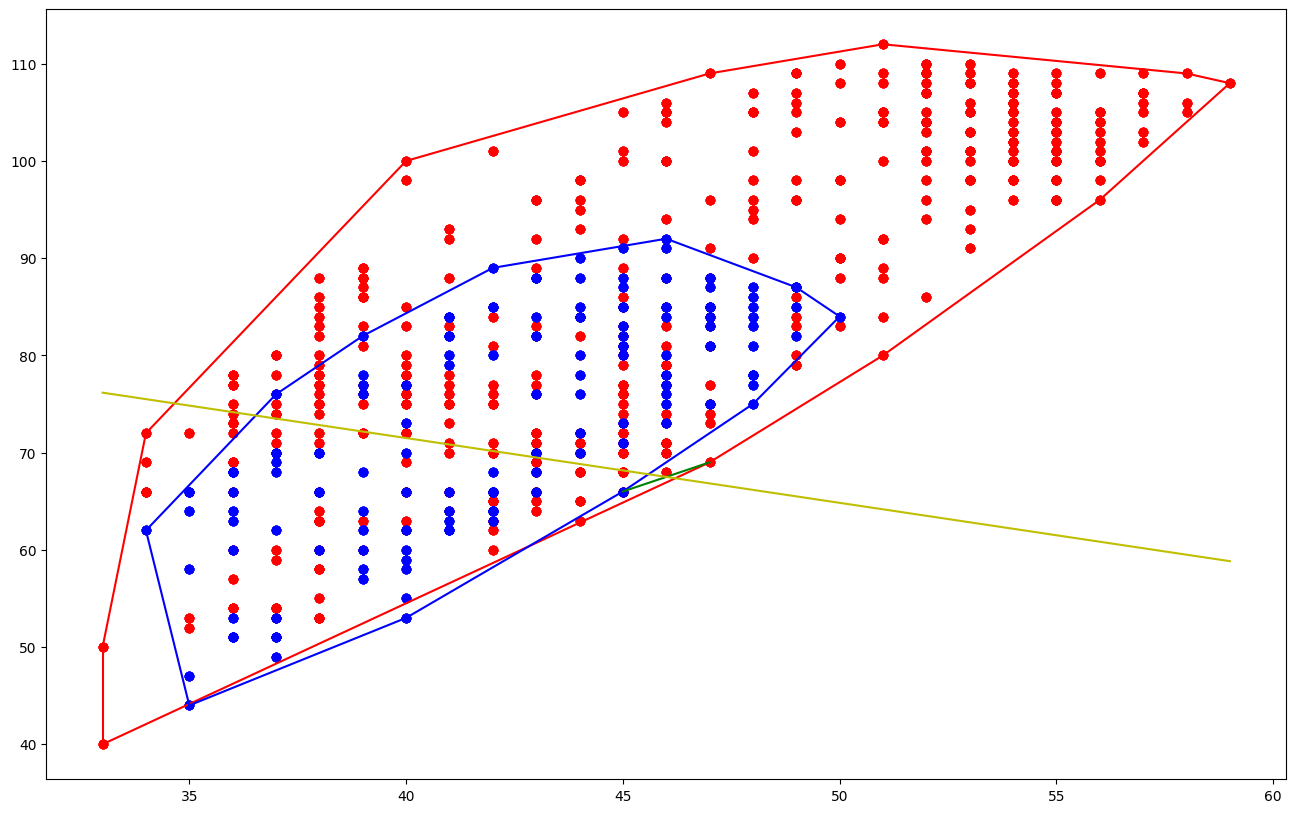

In [21]:
CHclf12.plotHulls()

#### Verificando separabilidade linear dos pontos

In [22]:
CHclf12.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [23]:
CHresults12["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.186813,0.680000,0.186813,0.305085
1,0.260000,0.838710,0.260000,0.330508
2,0.285714,0.838710,0.285714,0.406780
3,0.242424,0.888889,0.242424,0.338983
4,0.247191,0.687500,0.247191,0.347458


#### Resultados do teste

In [24]:
CHresults12["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.18408,0.711538,0.18408,0.295276


#### Criando instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [6]:
KNNclf = KNNClassifier(points, maxK=30, nFolds=5)
KNNresults = KNNclf.run()

#### Resultados da validação cruzada com 5 folds

In [36]:
KNNresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.840000,0.777778,0.840000,0.915254
1,0.935484,0.828571,0.935484,0.932203
2,0.863636,0.760000,0.863636,0.923729
3,0.869565,0.869565,0.869565,0.949153
4,0.827586,0.857143,0.827586,0.923729


#### Resultados do teste

In [37]:
KNNresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.863636,0.934426,0.863636,0.948819


#### Comparação da diferença média para as métricas _Precisão_, _Sensibilidade_, _F1 Score_ e _Acurácia_ entre os classificadores par a par

#### Criando instâncias dos classificadores para comparação

In [6]:
CHclf01 = ConvexHullClassifier.buildInstance(name="ConvexHullClassifier01", coordinate1=0, coordinate2=1, nFolds=5)
CHclf12 = ConvexHullClassifier.buildInstance(name="ConvexHullClassifier12", coordinate1=1, coordinate2=2, nFolds=5)
KNNclf = KNNClassifier.buildInstance(maxK=30, nFolds=5)

Para efeutar a comparação, um bootstrapping foi feito usando 100 amostras com reposição e 100 indivíduos em cada uma delas.

In [7]:
clfComparison = ClassifiersComparison(points, [KNNclf, CHclf01, CHclf12], sampleSize=100, nSamples=50)
diff = clfComparison.run()
diff

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:70: RuntimeWarning: invalid value encountered in long_scalars
  recall: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:70: RuntimeWarning: invalid value encountered in long_scalars
  recall: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision

,Precision,Recall,F1,Accuracy,Label
0,0.350877,-0.101010,0.350877,0.366667,KNNClassifier/ConvexHullClassifier01
1,0.500000,-0.066667,0.500000,0.266667,KNNClassifier/ConvexHullClassifier01
2,0.708333,0.402778,0.708333,0.566667,KNNClassifier/ConvexHullClassifier01
3,0.494253,-0.583333,0.494253,0.600000,KNNClassifier/ConvexHullClassifier01
4,0.500000,0.428571,NaN,0.366667,KNNClassifier/ConvexHullClassifier01
...,...,...,...,...,...
295,NaN,0.000000,NaN,0.133333,ConvexHullClassifier12/ConvexHullClassifier01
296,-0.008333,0.375000,-0.008333,-0.066667,ConvexHullClassifier12/ConvexHullClassifier01
297,-0.114286,0.000000,-0.114286,-0.166667,ConvexHullClassifier12/ConvexHullClassifier01
298,-0.026667,0.000000,-0.026667,-0.166667,ConvexHullClassifier12/ConvexHullClassifier01


#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (0, 1)

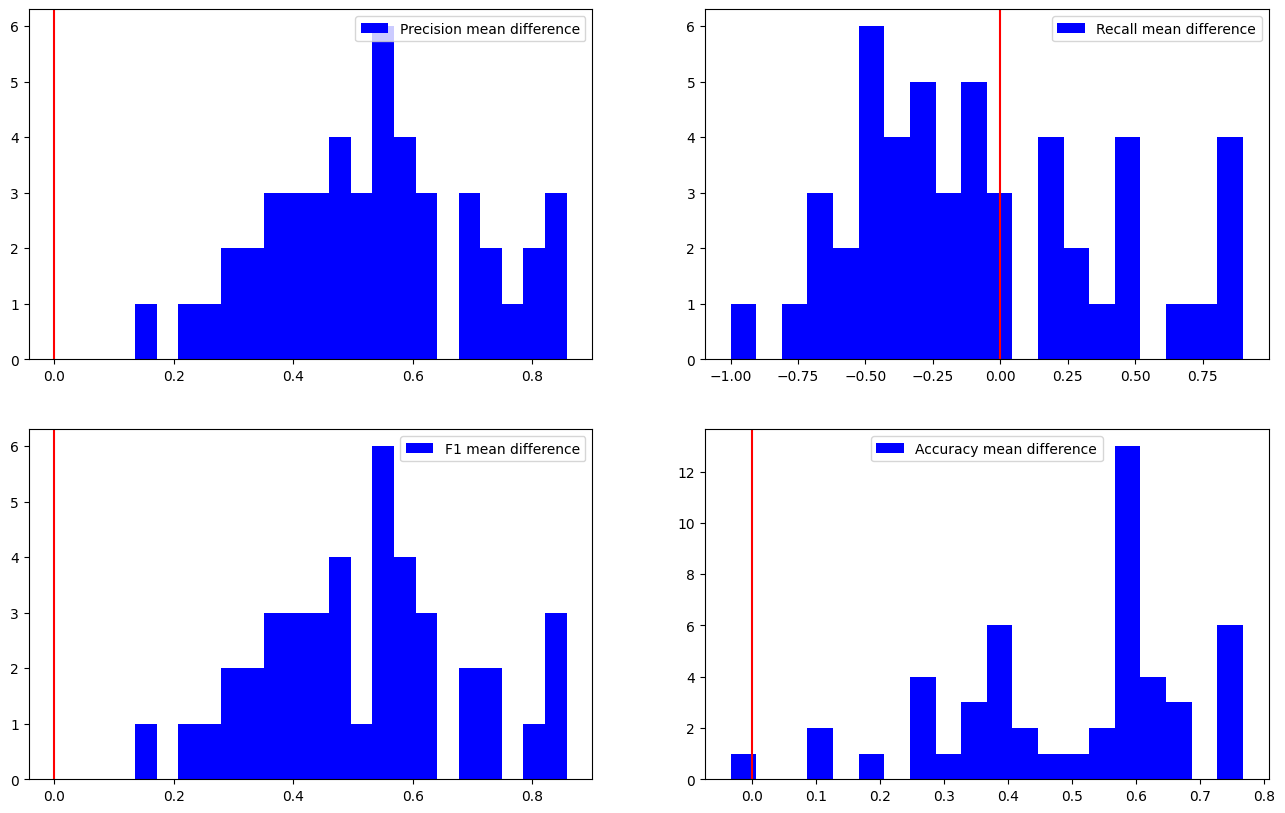

In [8]:
clfComparison.plotPairComparison('KNNClassifier/ConvexHullClassifier01')

#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (1, 2)

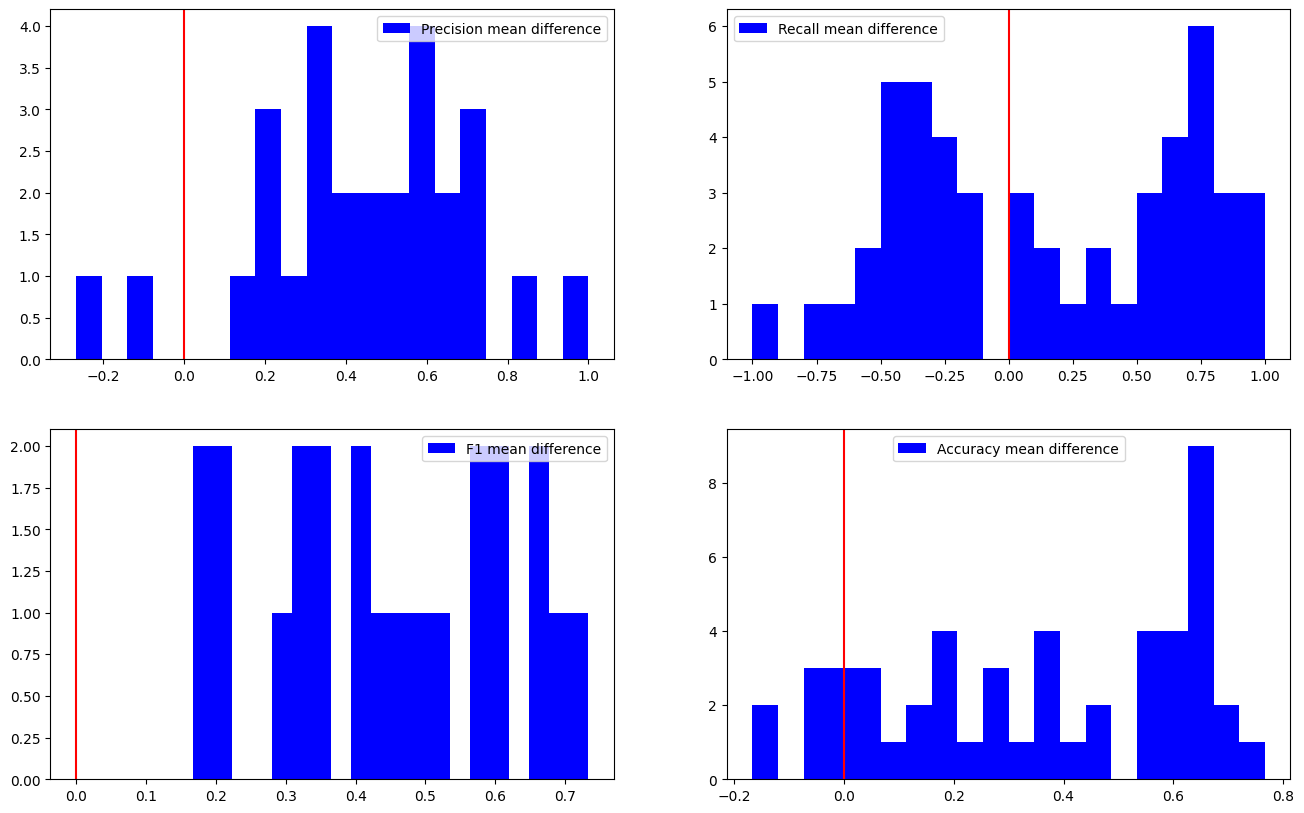

In [9]:
clfComparison.plotPairComparison('KNNClassifier/ConvexHullClassifier12')

## Valores NaN

Tanto para esse dataset quanto para alguns outros, é possível perceber a ocorrência de valores _NaN_ para algumas métricas nos resultados da validação cruzada e do teste para o classificador baseado em envoltórias. Isso se deve ao fato de que, para algumas bases de dados, a linha usada para classificação que separa as envoltórias em duas classes pode estar acima de ambas as envoltórias, classificando todos os pontos como negativos. Dessa forma TP (Verdadeiros Positivos) + FP (Falsos Positivos) = 0, e o denominador da _Precisão_, cuja fórmula é TP/(TP + FP), é igual a 0. Tal fato interfere também no cálculo da métrica _F1 Score_, que depende da _Precisão_.

## Análise dos resultados

Para este dataset, é possível perceber que a diferença média para as métricas _Precisão_, _F1 Score_ e _Acurácia_ está bem acima de 0, ou seja, o classificador KNN é melhor, de modo geral. Isso se deve ao fato de que dados reais, na grande maioria das vezes, não são linearmente separáveis, e o classificador baseado em envoltórias depende de tal característica para performar bem. Além disso, o KNN considera todas as dimensões do dado no treino e para fazer a previsão, de forma a ter mais informações, enquanto o classificador baseado em envoltórias só utiliza duas dimensões.

Uma hipótese para o fato de que a _Sensibilidade_ (Recall) está centrada próxima de 0 nas comparações, como pode ser visto nos gráficos, é que o classificador baseado em envoltórias, para algumas amostras, classifica todos os pontos como positivos. Assim, nenhum falso negativo é produzido e a _Sensibilidade_ (Recall) é igual a 1. Dessa forma, apesar de não se ajustar bem aos dados, a sensibilidade igual a 1 em boa parte das amostras consegue balancear a comparação.